Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        85
           1       0.89      0.68      0.77        80

    accuracy                           0.80       165
   macro avg       0.82      0.80      0.80       165
weighted avg       0.82      0.80      0.80       165



/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4572/3400873380.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4572/3400873380.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4572/3400873380.py:23: SettingWithCopyWarning: 
A value is trying to be set o

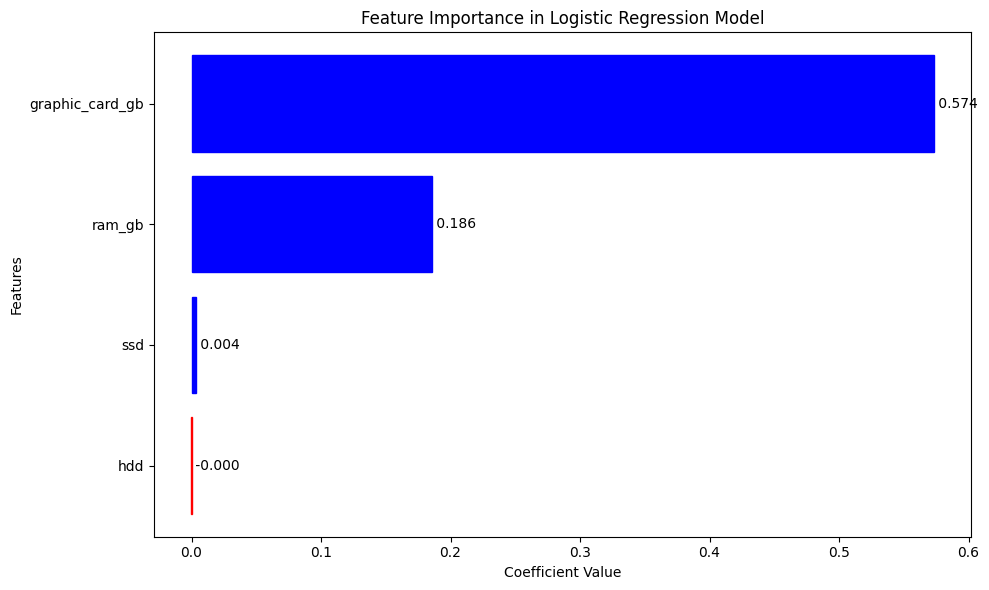


Feature Coefficients:
           Feature  Coefficient  Abs_Coefficient
3  graphic_card_gb     0.573552         0.573552
0           ram_gb     0.185718         0.185718
1              ssd     0.003785         0.003785
2              hdd    -0.000267         0.000267


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../Ensemble/boosting/xgboost/laptopPrice.csv')

# Create binary target variable based on price threshold (median price)
median_price = df['Price'].median()
df['high_price'] = (df['Price'] > median_price).astype(int)

# Select features
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]

# Clean numeric features by removing 'GB' and converting to float
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

y = df['high_price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create feature importance DataFrame and plot
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort features by absolute coefficient value
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])

# Color code bars based on positive/negative coefficients
for bar in bars:
    if bar.get_width() < 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Add value labels on the bars
for i, v in enumerate(feature_importance['Coefficient']):
    plt.text(v, i, f' {v:.3f}', va='center')

plt.tight_layout()
plt.show()

print("\nFeature Coefficients:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))
